In [3]:
# cross country comparison 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Load cleaned datasets
benin_df = pd.read_csv("C:/Users/hp/Desktop/KAIM/Technical Content-20250515T164453Z-1-001/Technical Content/data/data/benin_clean11.csv")
sierra_df = pd.read_csv("C:/Users/hp/Desktop/KAIM/Technical Content-20250515T164453Z-1-001/Technical Content/data/data/sierra_leone_clean1.csv")
togo_df = pd.read_csv("C:/Users/hp/Desktop/KAIM/Technical Content-20250515T164453Z-1-001/Technical Content/data/data/togo_clean1.csv")

# Ensure Timestamp is datetime
benin_df["Timestamp"] = pd.to_datetime(benin_df["Timestamp"])
sierra_df["Timestamp"] = pd.to_datetime(sierra_df["Timestamp"])
togo_df["Timestamp"] = pd.to_datetime(togo_df["Timestamp"])


C:\Users\hp\AppData\Local\Temp\ipykernel_14948\527999787.py:15: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  togo_df["Timestamp"] = pd.to_datetime(togo_df["Timestamp"])


#Box plots 

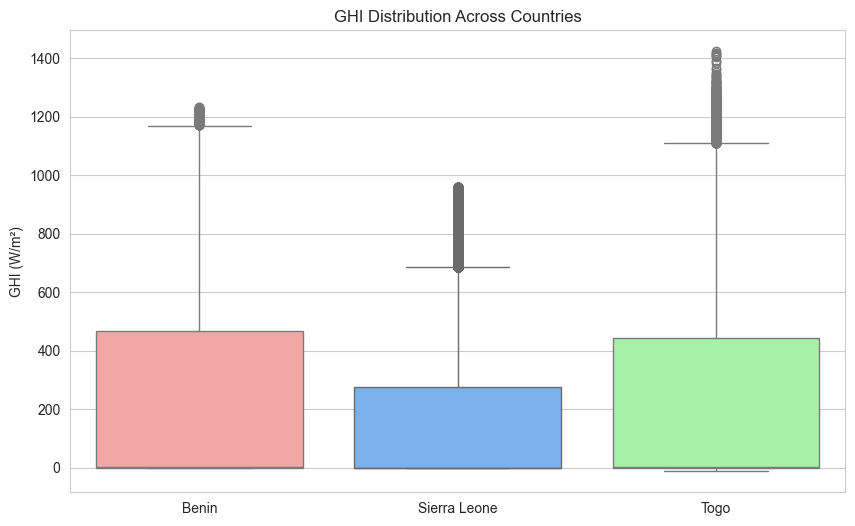

In [4]:
# Set style
sns.set_style("whitegrid")

# GHI Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=["Benin"] * len(benin_df), y=benin_df["GHI"], color="#FF9999")
sns.boxplot(x=["Sierra Leone"] * len(sierra_df), y=sierra_df["GHI"], color="#66B2FF")
sns.boxplot(x=["Togo"] * len(togo_df), y=togo_df["GHI"], color="#99FF99")
plt.title("GHI Distribution Across Countries")
plt.ylabel("GHI (W/m²)")
plt.show()

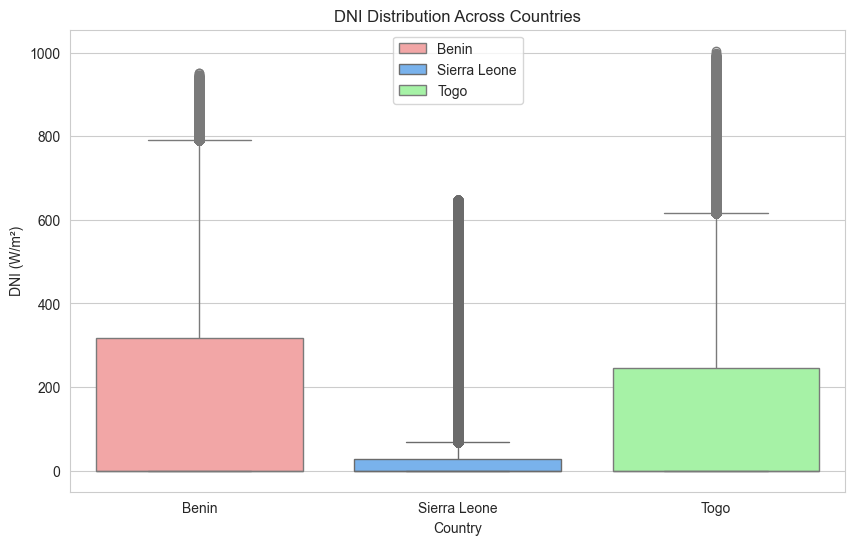

In [5]:
# DNI Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=["Benin"] * len(benin_df), y=benin_df["DNI"], color="#FF9999", label="Benin")
sns.boxplot(x=["Sierra Leone"] * len(sierra_df), y=sierra_df["DNI"], color="#66B2FF", label="Sierra Leone")
sns.boxplot(x=["Togo"] * len(togo_df), y=togo_df["DNI"], color="#99FF99", label="Togo")
plt.title("DNI Distribution Across Countries")
plt.ylabel("DNI (W/m²)")
plt.xlabel("Country")
plt.legend()
plt.show()


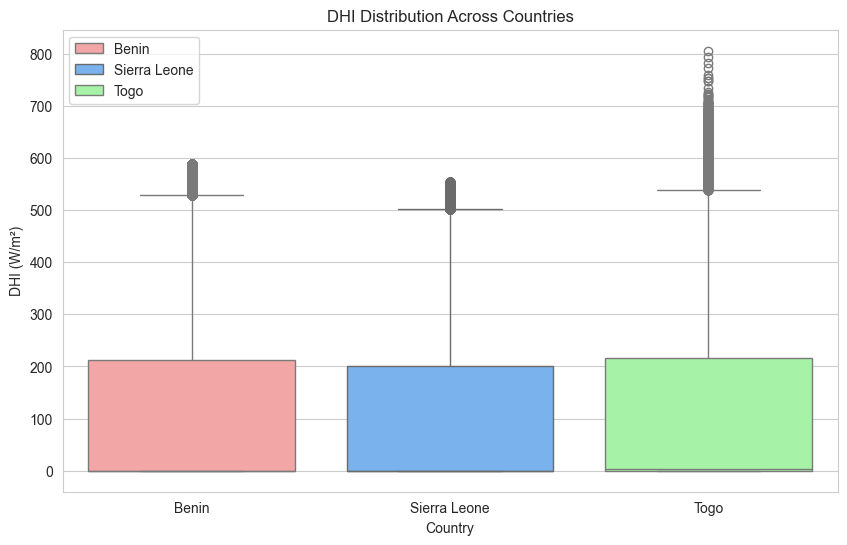

In [6]:
# DHI Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=["Benin"] * len(benin_df), y=benin_df["DHI"], color="#FF9999", label="Benin")
sns.boxplot(x=["Sierra Leone"] * len(sierra_df), y=sierra_df["DHI"], color="#66B2FF", label="Sierra Leone")
sns.boxplot(x=["Togo"] * len(togo_df), y=togo_df["DHI"], color="#99FF99", label="Togo")
plt.title("DHI Distribution Across Countries")
plt.ylabel("DHI (W/m²)")
plt.xlabel("Country")
plt.legend()
plt.show()

In [7]:
# Summary statistics for GHI, DNI, DHI
summary = pd.DataFrame({
    "Benin": [benin_df["GHI"].mean(), benin_df["DNI"].mean(), benin_df["DHI"].mean(),
              benin_df["GHI"].median(), benin_df["DNI"].median(), benin_df["DHI"].median(),
              benin_df["GHI"].std(), benin_df["DNI"].std(), benin_df["DHI"].std()],
    "Sierra Leone": [sierra_df["GHI"].mean(), sierra_df["DNI"].mean(), sierra_df["DHI"].mean(),
                     sierra_df["GHI"].median(), sierra_df["DNI"].median(), sierra_df["DHI"].median(),
                     sierra_df["GHI"].std(), sierra_df["DNI"].std(), sierra_df["DHI"].std()],
    "Togo": [togo_df["GHI"].mean(), togo_df["DNI"].mean(), togo_df["DHI"].mean(),
             togo_df["GHI"].median(), togo_df["DNI"].median(), togo_df["DHI"].median(),
             togo_df["GHI"].std(), togo_df["DNI"].std(), togo_df["DHI"].std()]
}, index=["GHI Mean", "DNI Mean", "DHI Mean",
          "GHI Median", "DNI Median", "DHI Median",
          "GHI Std Dev", "DNI Std Dev", "DHI Std Dev"])

print("Summary Table (Metrics in W/m²):")
print(summary.round(2))

Summary Table (Metrics in W/m²):
              Benin  Sierra Leone    Togo
GHI Mean     237.48        159.99  230.56
DNI Mean     167.14         81.78  151.26
DHI Mean     113.17        102.35  116.44
GHI Median     0.60          0.00    2.10
DNI Median     0.00          0.00    0.00
DHI Median     0.40          0.00    2.50
GHI Std Dev  327.17        247.49  322.53
DNI Std Dev  261.94        168.71  250.96
DHI Std Dev  151.66        146.90  156.52


In [8]:
from scipy.stats import kruskal

# Kruskal-Wallis test for GHI across countries
h_stat, p_value = kruskal(benin_df["GHI"], sierra_df["GHI"], togo_df["GHI"])
print(f"Kruskal-Wallis Test Results for GHI: H-statistic = {h_stat:.4f}, p-value = {p_value:.4f}")

Kruskal-Wallis Test Results for GHI: H-statistic = 53032.6965, p-value = 0.0000


## Key Observations
Benin has the highest mean GHI (237.48 W/m²) and the greatest standard deviation (327.17), indicating strong solar energy potential with significant variability.
Sierra Leone exhibits the lowest mean values for both GHI (159.99 W/m²) and DNI (81.78 W/m²), suggesting limited solar energy potential compared to Benin and Togo.
	Togo shows a relatively high mean DHI (116.44 W/m²) and a moderate standard deviation (156.52), indicating a potential for effective utilization of diffuse solar radiation. The Kruskal-Wallis test indicates highly significant differences in GHI across countries (H-statistic = 53032.6965, p-value = 0.0000).


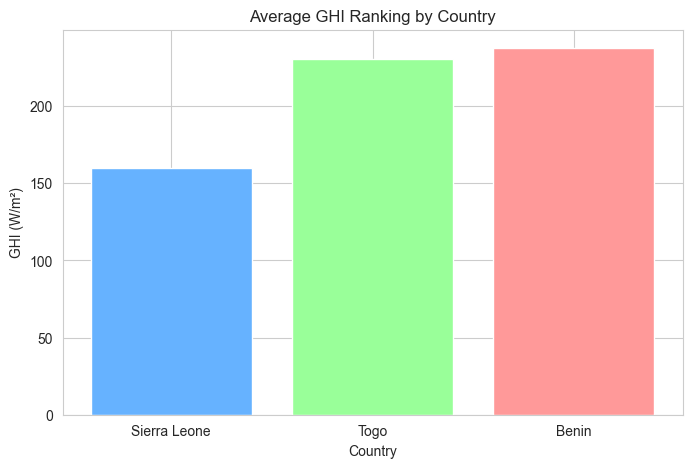

In [9]:
# Bar chart for average GHI
countries = ["Sierra Leone", "Togo", "Benin"]
ghi_means = [sierra_df["GHI"].mean(), togo_df["GHI"].mean(), benin_df["GHI"].mean()]
plt.figure(figsize=(8, 5))
plt.bar(countries, ghi_means, color=["#66B2FF", "#99FF99", "#FF9999"])
plt.title("Average GHI Ranking by Country")
plt.ylabel("GHI (W/m²)")
plt.xlabel("Country")
plt.show()